In [1]:
#Importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
df = pd.read_csv('odi.csv')

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


In [4]:
#get the description of the numerical features
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mid,350899.0,594.360426,343.605128,1.0,296.0,596.0,893.0,1188.0
runs,350899.0,114.801661,77.665959,0.0,51.0,105.0,168.0,444.0
wickets,350899.0,2.974970,2.298959,0.0,1.0,3.0,4.0,10.0
overs,350899.0,24.052899,14.235439,0.0,11.6,23.6,36.2,49.6
runs_last_5,350899.0,23.548303,11.042974,0.0,17.0,23.0,29.0,101.0
wickets_last_5,350899.0,0.669814,0.833895,0.0,0.0,0.0,1.0,7.0
striker,350899.0,35.180129,28.115264,0.0,13.0,29.0,50.0,264.0
non-striker,350899.0,12.427944,15.019181,0.0,2.0,7.0,18.0,149.0
total,350899.0,255.355387,62.354412,44.0,217.0,257.0,298.0,444.0


**It is evident, that we don't have any Null values/missing values.**

In [5]:
#Let's make a new dataset with the numerical columns only
df_num=df.select_dtypes(include=np.number)
df_num.head()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,0,0,0.1,0,0,0,0,301
1,1,0,0,0.2,0,0,0,0,301
2,1,4,0,0.3,4,0,0,0,301
3,1,6,0,0.4,6,0,0,0,301
4,1,6,0,0.5,6,0,0,0,301


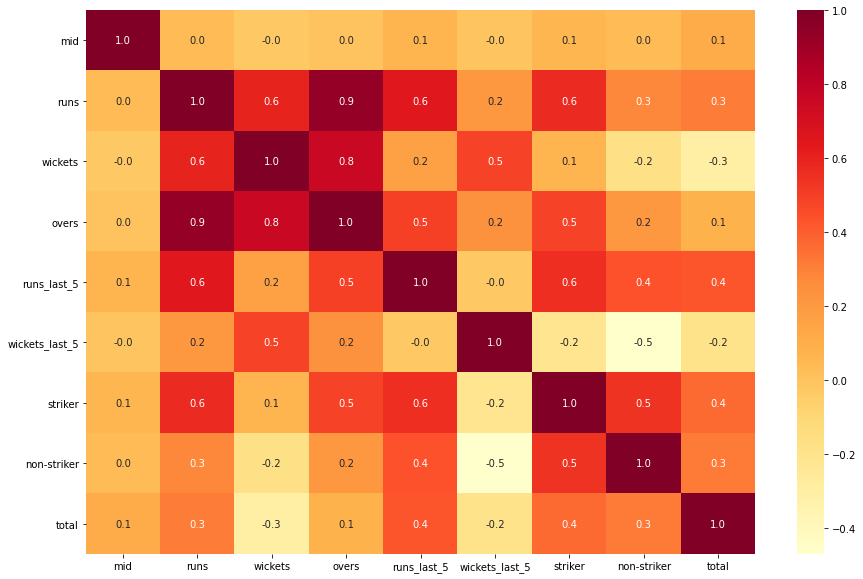

In [6]:
#Visualize the correlation between the features
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df_num.corr(method='pearson'), annot=True, fmt= '.1f',ax=ax, cmap="YlOrRd")

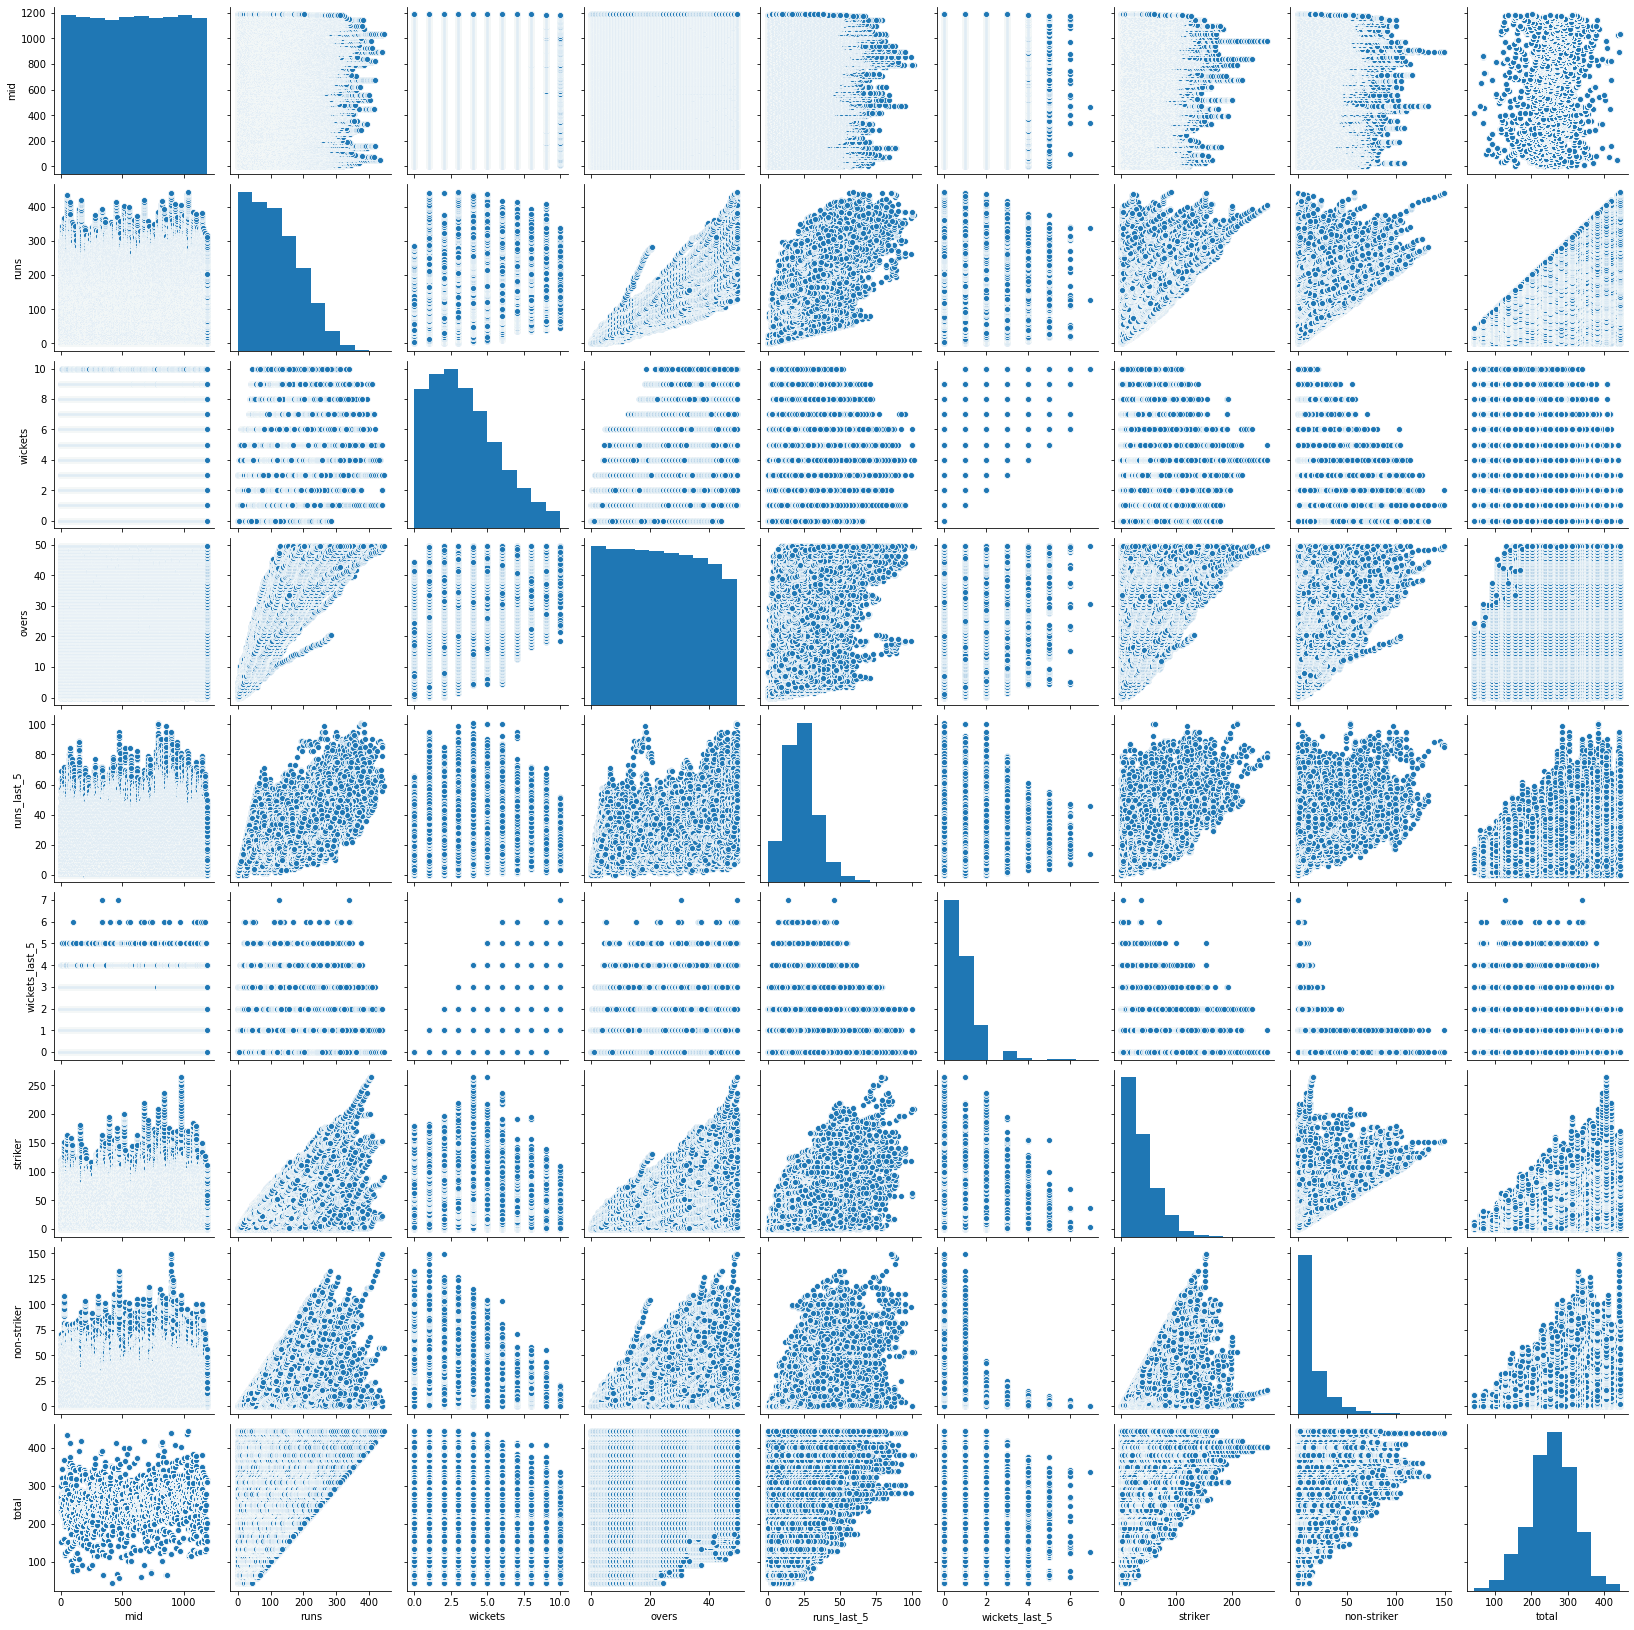

In [7]:
#checking the relation between each 2 features of the dataset
sns.pairplot(df_num)

**The pair plot says that the independent variables are quiet imbalanced. Hence we will standardise the features after splitting the dataset into training and test dataset.**

In [8]:
X = df_num.iloc[:,[1,2,3,6,7]].values  #considering runs, wickets, overs, stricker (run) and non-stricker(run) as independent features.
y = df_num.iloc[:, 8].values   #Considering total as the dependent feature

In [9]:
#splitting the dataset into traing and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state = 0)

In [10]:
#Using StandardScaler to scale down the independent features to make them ballanced
from sklearn.preprocessing import StandardScaler
stsc = StandardScaler()
X_train = stsc.fit_transform(X_train)
X_test = stsc.transform(X_test)

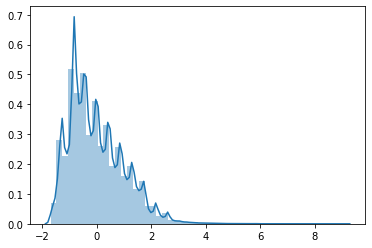

In [11]:
#checking the distribution of training data after standardisation
sns.distplot(X_train)

**Our data has clearly been standardised!**

# Machine Learning model building...

**1. Multiple Linear Regression-**

In [12]:
from sklearn.linear_model import LinearRegression
MLR = LinearRegression()
MLR.fit(X_train,y_train)  #fitting the training data

LinearRegression()

In [13]:
y_pred = MLR.predict(X_test)   #predicting the result upon test data
score = MLR.score(X_test,y_test)*100
print("Accuracy=" , score)

Accuracy= 52.71420417216175


Here the accuracy comes out to be only 52.714%. Which is not at all considerable.

**2. Decision Tree Regression-**

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
DTR=DecisionTreeRegressor()

In [21]:
DTR.fit(X_train,y_train)  #training the model with train data
y_pred2=DTR.predict(X_test)  #predicting the result with test data

In [22]:
score = DTR.score(X_test,y_test)*100    #getting the score of the model
print("Accuracy=" , score)

Accuracy= 68.56652545501981


Using Decision Tree regression, our accuracy increases upto a considerable level, i.e. 68.558%.

**3. Random Forest Regression-**

In [23]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100,max_features=None)
RFR.fit(X_train,y_train) #training the model with train set

RandomForestRegressor(max_features=None)

In [24]:
y_pred3 = RFR.predict(X_test)  #predicting the result with test set
score = RFR.score(X_test,y_test)*100
print("Accuracy=" , score)

Accuracy= 79.88531341040463


**So, the Random Forest Regressor is giving an awesome accuracy of around 80%!**

**Hence it can definitely be considered as our best model. And now we are going to test our model with some new random inputs!**

In [25]:
example = RFR.predict(stsc.transform(np.array([[100,0,13,50,50]])))
print("Prediction score:" ,example)

Prediction score: [307.57]


**In this way we can easily predict the Second innings score successfully using the first innings ball by ball data using this kind of Machine Learning models.**

# Checking Aggressiveness

**To check the aggressiveness we have to check the runs scored based on other parameters like over, wickets and current score of the stricker as well as the non-striker!**

In [41]:
a = df_num.iloc[:,[2,3,4,5,6,7]].values  #considering wickets, overs, runs_last_5, wickets_last_5, stricker (run) and non-stricker(run) as independent features.
b = df_num.iloc[:, 1].values   #considering runs as the target variable

In [42]:
#splitting the dataset into traing and test data
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.22, random_state = 0)

In [43]:
#Using StandardScaler to scale down the independent features to make them ballanced
from sklearn.preprocessing import StandardScaler
stsc1 = StandardScaler()
a_train = stsc1.fit_transform(a_train)
a_test = stsc1.transform(a_test)

**1. Multiple Linear Regression-**

In [44]:
from sklearn.linear_model import LinearRegression
MLR2 = LinearRegression()
MLR2.fit(a_train,b_train)  #fitting the training data

LinearRegression()

In [45]:
b_pred = MLR2.predict(a_test)   #predicting the result upon test data
score = MLR2.score(a_test,b_test)*100
print("Accuracy=" , score)

Accuracy= 92.76216956583617


**The Linear Regression is performing great, we have around 93% accuracy. Let's check other advanced Regression models!**

**2. Decision Tree Regression-**

In [46]:
DTR2=DecisionTreeRegressor()

In [47]:
DTR2.fit(a_train,b_train)  #training the model with train data
b_pred2=DTR2.predict(a_test)  #predicting the result with test data

In [48]:
score = DTR2.score(a_test,b_test)*100    #getting the score of the model
print("Accuracy=" , score)

Accuracy= 95.81743273274577


**As expected Decision Tree regressor is giving us further more accuracy! That's really awesome!**

**Random Forest Regression-**

In [49]:
RFR2 = RandomForestRegressor(n_estimators=100,max_features=None)
RFR2.fit(a_train,b_train) #training the model with train set

RandomForestRegressor(max_features=None)

In [50]:
b_pred3 = RFR2.predict(a_test)  #predicting the result with test set
score = RFR2.score(a_test,b_test)*100
print("Accuracy=" , score)

Accuracy= 97.94016933417778


**Random Forest is performing the best. Here also it is giving maximum accuracy, which is a whooping 98%!**

As all the models are performing really well we'll check the Mean Absolute Error metric to choose the best model.

In [51]:
from sklearn.metrics import mean_absolute_error

In [52]:
mae1=mean_absolute_error(b_test, b_pred)   #for Linear regression
mae1

15.533923447394969

In [53]:
mae2=mean_absolute_error(b_test, b_pred2)     #for Decision Tree Regression
mae2

6.785216585921915

In [54]:
mae3=mean_absolute_error(b_test, b_pred3)      #for Random Forest Regression
mae3

6.501608419212836

**Hence it is confirmed that the Random Forest Regressor is performing the best with the least error incorporated.**

**Let's check our model with new random data...**

In [57]:
example_run = RFR2.predict(stsc1.transform(np.array([[1,22.3,11,3,42,3]])))
print("Predicted run:" ,example_run)

Predicted run: [101.64]


Now aggressiveness can be found from the run-rate at a particular situation.

In [75]:
Run_rate=example_run/np.array([[22.3]])
Run_rate

array([[4.55784753]])

**That is how the aggresiveness of the batsmen can be found using the model in a particular phase of a match!**

**The paper entitled "Modelling and simulation for one-day cricket" has been successfully implemented upto a certain level.**